In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [65]:
df = pd.read_csv("bestsellers with categories.csv")

In [66]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [67]:
df.shape

(550, 7)

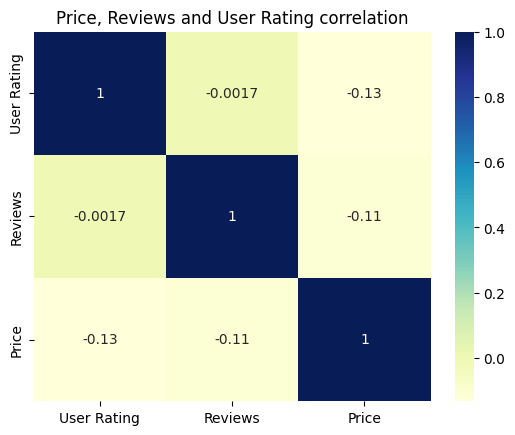

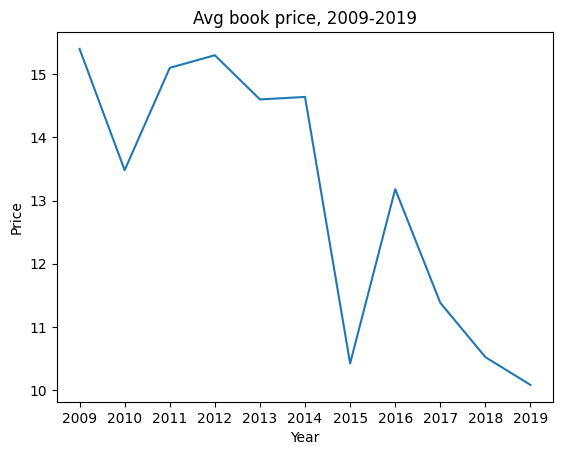

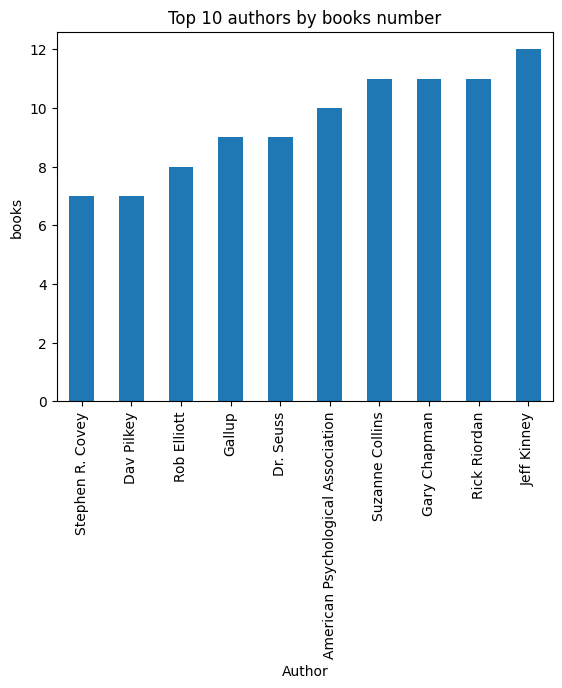

In [90]:
df2 = df.loc[:, ["User Rating","Reviews", "Price"]]
sns.heatmap(df2.corr(), cmap="YlGnBu", annot=True)
plt.title("Price, Reviews and User Rating correlation")
plt.show()

df3 = df.groupby("Year")["Price"].mean()
df3.plot()
plt.xticks(np.arange(df["Year"].min(), df["Year"].max()+1, 1))
plt.title("Avg book price, 2009-2019")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

df4 = df.groupby("Author")["Author"].count().sort_values().tail(10)
df4.plot(kind="bar")
plt.ylabel("books")
plt.title("Top 10 authors by books number")
plt.xticks(rotation=90)
plt.show()

### О скольки книгах хранит данные датасет? 
### Answer: 550

In [23]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [24]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

### Есть ли в каких либо переменных пропуски? 
### Answer: No

In [25]:
df["genre"].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

### Какие есть уникальные жанры?
### Answer: 'Non Fiction', 'Fiction'

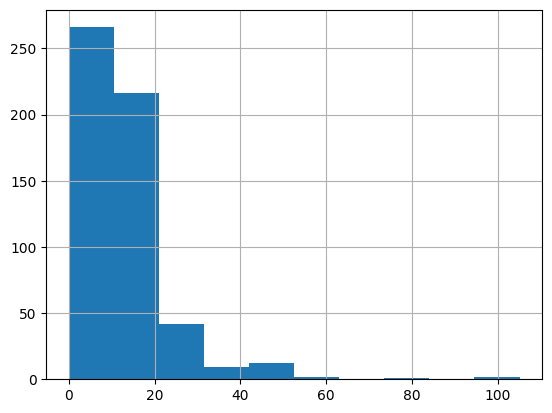

In [26]:
df["price"].hist()
plt.show()

In [27]:
df["price"].describe()

count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: price, dtype: float64

### Mаксимальная цена?
### Answer: 105
### Минимальная цена?
### Answer: 0
### Средняя цена?
### Answer: 13.1
### Медианная цена?
### Answer: 11

In [28]:
df["user_rating"].max()

4.9

### Ответ: Какой рейтинг в датасете наивысший? Ответ: 4.9

In [29]:
df[["name", "user_rating"]][df["user_rating"] == df["user_rating"].max()].shape

(52, 2)

### Ответ: Сколько книг имеют такой рейтинг? Ответ: 52

In [30]:
df[["name", "reviews"]][df["reviews"] == df["reviews"].max()]

,name,reviews
534,Where the Crawdads Sing,87841


### Ответ: У какой книги больше всего отзывов? Ответ: Where the Crawdads Sing

In [31]:
df2 = df[["name", "price"]][df["year"]==2015]

df2[["name", "price"]][df2["price"]== df2["price"].max()] 

,name,price
277,Publication Manual of the American Psychologic...,46


### Ответ: Из тех книг, что попали в Топ-50 в 2015 году, какая книга самая дорогая (можно использовать промежуточный датафрейм)? Ответ:Publication Manual of the American Psychologic..

In [32]:
df[["name"]][((df["year"]==2010) & (df["genre"] == "Fiction"))].size

20

### Ответ: Сколько книг жанра Fiction попали в Топ-50 в 2010 году (используйте &)? Ответ: 20

In [33]:
df[["name", "year", "user_rating"]][(((df["year"]==2010) | (df["year"]==2011)) & (df["user_rating"] == 4.9))]

,name,year,user_rating
187,Jesus Calling: Enjoying Peace in His Presence ...,2011,4.9


### Ответ: Сколько книг c рейтингом 4.9 попало в рейтинг в 2010 и 2011 годах (используйте | или функцию isin)? Ответ: 1

In [34]:
sorted_df = df[["name", "price"]][(df["year"]==2015) & (df["price"]<8)].sort_values(by=["price"], ascending=True)
sorted_df

,name,price
507,To Kill a Mockingbird,0
210,Laugh-Out-Loud Jokes for Kids,4
206,Knock-Knock Jokes for Kids,4
111,First 100 Words,4
123,Giraffes Can't Dance,4
54,Creative Haven Creative Cats Coloring Book (Ad...,4
63,Dear Zoo: A Lift-the-Flap Book,5
89,Dover Creative Haven Art Nouveau Animal Design...,5
478,The Very Hungry Caterpillar,5
201,Killing Reagan: The Violent Assault That Chang...,5


In [35]:
sorted_df.tail(1)

,name,price
253,Old School (Diary of a Wimpy Kid #10),7


### Ответ: Какая книга последняя в отсортированном списке? Ответ: Old School (Diary of a Wimpy Kid #10)	

In [36]:
new_df = df.copy(deep=True)
genre_df = new_df.groupby(["genre"])

In [37]:
genre_df_max = genre_df.agg({"price": "max"})
genre_df_min = genre_df.agg({"price": "min"})

In [38]:
print("max:")
print(genre_df_max.loc["Fiction"])
print(genre_df_max.loc["Non Fiction"])
print("min:")
print(genre_df_min.loc["Fiction"])
print(genre_df_min.loc["Non Fiction"])

max:
price    82
Name: Fiction, dtype: int64
price    105
Name: Non Fiction, dtype: int64
min:
price    0
Name: Fiction, dtype: int64
price    0
Name: Non Fiction, dtype: int64


### Ответ: Максимальная цена для жанра Fiction: Ответ 81
### Ответ: Минимальная цена для жанра Fiction: Ответ 0
### Ответ: Максимальная цена для жанра Non Fiction: Ответ 105
### Ответ: Минимальная цена для жанра Non Fiction: Ответ 0

In [39]:
second_copy = df.copy(deep=True)
df_author = second_copy.groupby(["author"]).agg({"author": "count"})
df_author.shape

(248, 1)

### Ответ: Какой размерности вышла таблица? Ответ: (248, 1)

In [40]:
df_author[df_author["author"]==df_author["author"].max()]

,author
author,
Jeff Kinney,12


### Ответ: У какого автора больше всего книг? Ответ: Jeff Kinney
### Ответ: Сколько книг у этого автора? Ответ: 12

In [41]:
rating_df = df.copy()
df_rate = rating_df.groupby(["author"]).agg({"user_rating": "mean"})
df_rate

,user_rating
author,
Abraham Verghese,4.600000
Adam Gasiewski,4.400000
Adam Mansbach,4.800000
Adir Levy,4.800000
Admiral William H. McRaven,4.700000
...,...
Walter Isaacson,4.566667
William Davis,4.400000
William P. Young,4.600000


In [42]:
df_rate[df_rate["user_rating"] == df_rate["user_rating"].min()]

,user_rating
author,
Donna Tartt,3.9


### Ответ: У какого автора средний рейтинг минимальный? Ответ: Donna Tartt

### Ответ: Какой у этого автора средний рейтинг? Ответ: 3.9

In [43]:
joined_df = pd.concat([df_rate, df_author], axis=1)
joined_df

,user_rating,author
author,,
Abraham Verghese,4.600000,2
Adam Gasiewski,4.400000,1
Adam Mansbach,4.800000,1
Adir Levy,4.800000,1
Admiral William H. McRaven,4.700000,1
...,...,...
Walter Isaacson,4.566667,3
William Davis,4.400000,2
William P. Young,4.600000,2


In [44]:
joined_df = joined_df.rename(columns={"author": "count"})

In [45]:
joined_df.sort_values(by=["count", "user_rating"])

,user_rating,count
author,,
Muriel Barbery,4.000000,1
Chris Cleave,4.100000,1
Ian K. Smith M.D.,4.100000,1
Pierre Dukan,4.100000,1
Elizabeth Strout,4.200000,1
...,...,...
American Psychological Association,4.500000,10
Suzanne Collins,4.663636,11
Gary Chapman,4.736364,11


### Ответ: Какой автор первый в списке?: Muriel Barbery	4.000000	1